# Week 6 Deliverable: LSTM
The purpose of this is to create and implement an LSTM Neural Network modeling approach, including training and validation of the model. 

In [1]:
from _Setup import *
from _Functions import *

Installing dependencies from requirements.txt...
All dependencies installed successfully.


## TODO : Split data using Time Series Cross Validation
This step shall be performed as it was depicted in the Week 1 Report and in the Hyndman book

In [2]:
# Load data as csv
sector_train = pd.read_csv(sector_data_csv_path_train_pivoted, index_col='Area of Responsibility')

# Import the scaler
with open(scalers_file, "rb") as file:
    scalers = pickle.load(file)

# DONE : Create scaled version of original Dataframe
# Apply pre-trained scalers row-wise

# Create an empty DataFrame to store scaled values
sector_train_scaled = pd.DataFrame(index=sector_train.index, columns=sector_train.columns)

# Apply each pre-trained scaler row-wise
for index, row in sector_train.iterrows():
	scaler = scalers[index]
	scaled_row = scaler.transform(row.values.reshape(-1, 1)).flatten()
	sector_train_scaled.loc[index] = scaled_row

In [3]:
# DONE : Create a process to windowize the data for cross-validation split
def validation_split(data, train_size = 12, validation_size = 12):
    """Input : Dataframe , Output : Array of Input"""
    """TODO : This may need to be converted to tensors"""

    train_input, validation_input = [], []

    for index, row in data.iterrows():
        split_index = train_size

        start = split_index - train_size
        end = split_index + validation_size

        train_set, validation_set = [], []

        while end <= len(row):
            train = row[start:split_index]
            val = row[split_index:end]

            train_set.append(train.values)
            validation_set.append(val.values)

            split_index += 1
            start = split_index - train_size
            end = split_index + validation_size

        train_input.append(train_set)
        validation_input.append(validation_set)

    return train_input, validation_input

In [4]:
input_size = 12
train_data, val_data = validation_split(sector_train_scaled, train_size=input_size)

In [5]:
# Import Test data
test_data = pd.read_csv(sector_data_csv_path_test_pivoted, index_col='Area of Responsibility')
# Function for MAPE, probably something predefined but here for ease of use
def mean_absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100

Atlanta Field Office
0
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - loss: 0.2367 - val_loss: 0.1755
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2332 - val_loss: 0.1748
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2263 - val_loss: 0.1739
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2307 - val_loss: 0.1729
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2332 - val_loss: 0.1718
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2292 - val_loss: 0.1706
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2243 - val_loss: 0.1692
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2201 - val_loss: 0.1676
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2310 - val_loss: 0.1657
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2189 - val_loss: 0.1634
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2195 - val_loss: 0.1606
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.

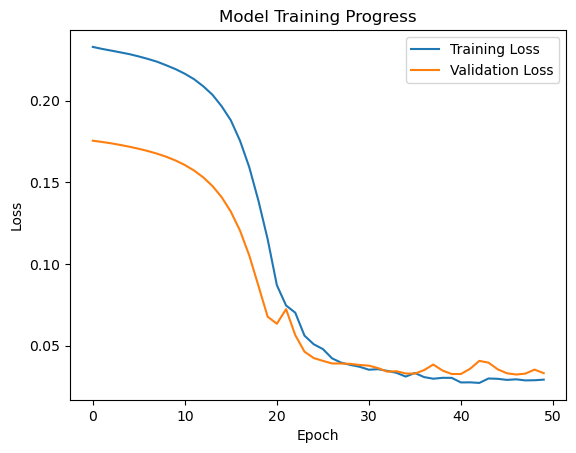

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


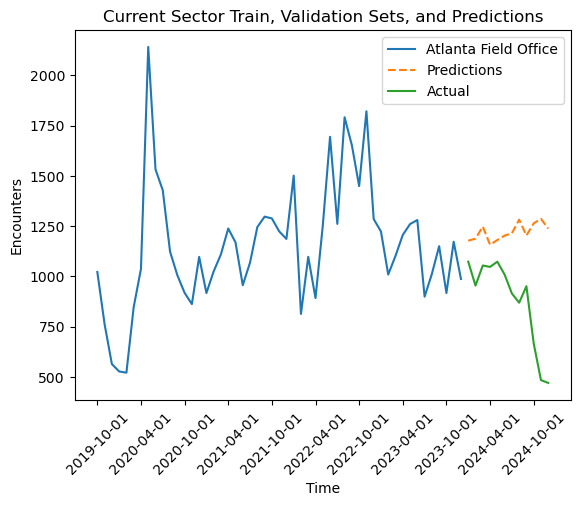

Baltimore Field Office
1
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - loss: 0.4926 - val_loss: 0.2497
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4864 - val_loss: 0.2480
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4947 - val_loss: 0.2461
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.4779 - val_loss: 0.2442
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4794 - val_loss: 0.2420
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4758 - val_loss: 0.2396
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4864 - val_loss: 0.2367
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4810 - val_loss: 0.2334
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4519 - val_loss: 0.2295
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4506 - val_loss: 0.2245
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4527 - val_loss: 0.2184
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 

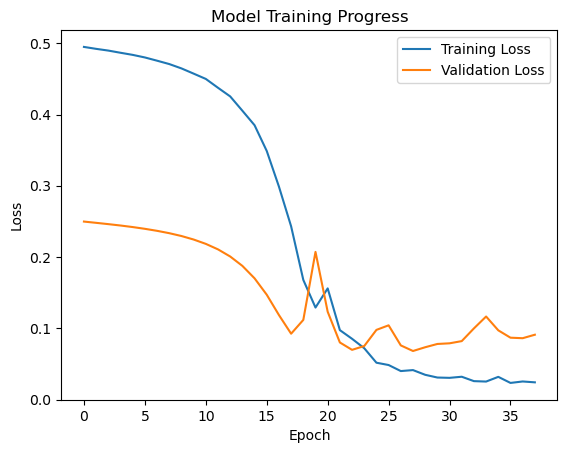

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


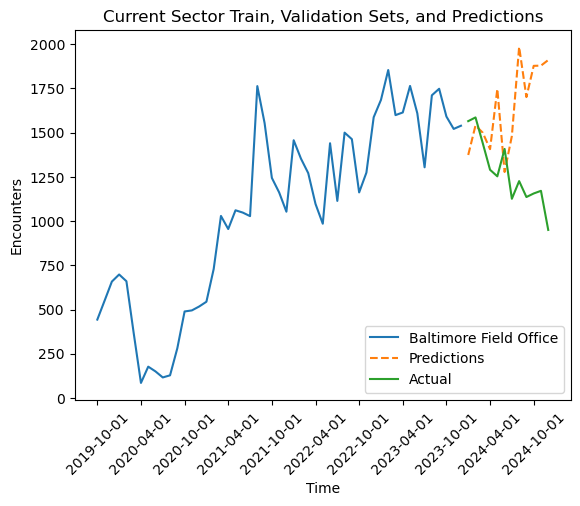

Big Bend Sector
2
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - loss: 0.2461 - val_loss: 0.2923
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2869 - val_loss: 0.2908
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2457 - val_loss: 0.2889
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2581 - val_loss: 0.2868
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2299 - val_loss: 0.2844
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2251 - val_loss: 0.2817
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2532 - val_loss: 0.2784
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2469 - val_loss: 0.2746
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2419 - val_loss: 0.2701
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2303 - val_loss: 0.2646
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2132 - val_loss: 0.2579
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2380 

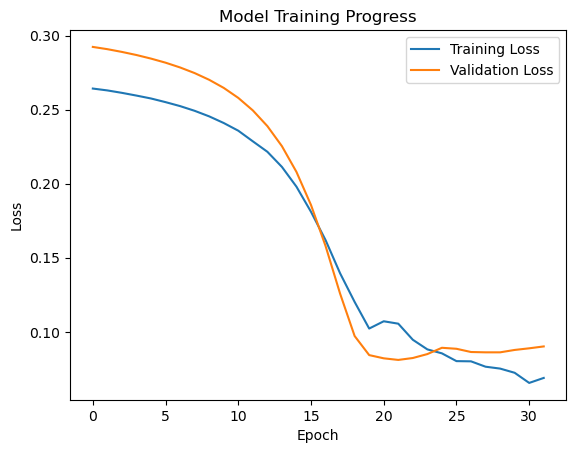

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


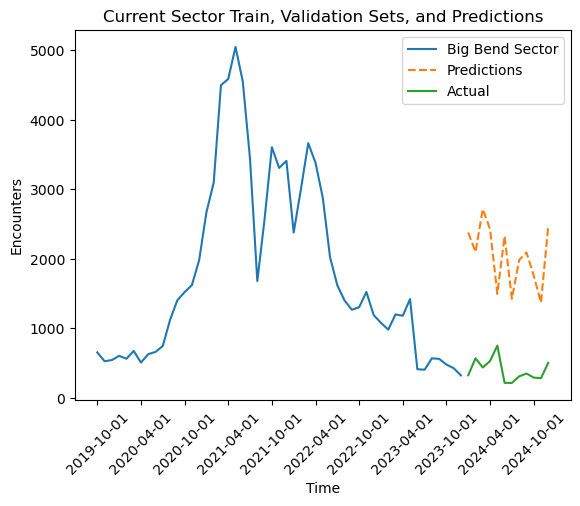

Blaine Sector
3
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 434ms/step - loss: 0.0506 - val_loss: 0.0038
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0483 - val_loss: 0.0037
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0451 - val_loss: 0.0035
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0456 - val_loss: 0.0034
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0376 - val_loss: 0.0033
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0378 - val_loss: 0.0032
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0455 - val_loss: 0.0030
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0403 - val_loss: 0.0029
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0458 - val_loss: 0.0027
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0423 - val_loss: 0.0026
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0411 - val_loss: 0.0024
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0368 - 

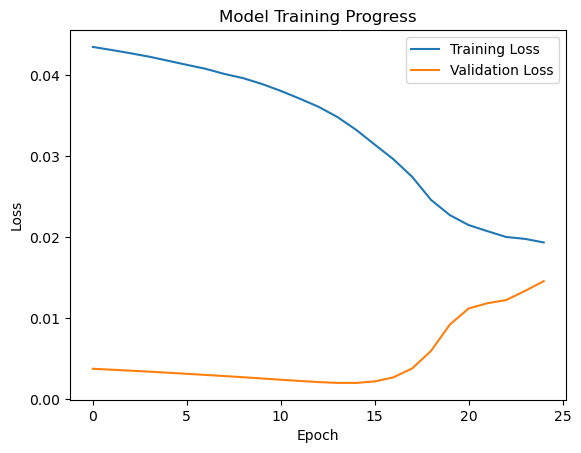

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step


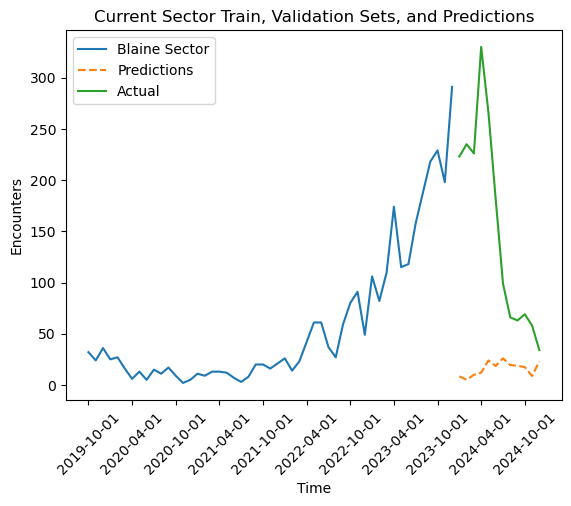

Boston Field Office
4
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - loss: 0.1672 - val_loss: 0.0446
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1390 - val_loss: 0.0442
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1793 - val_loss: 0.0438
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1687 - val_loss: 0.0434
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1527 - val_loss: 0.0429
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1740 - val_loss: 0.0424
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1604 - val_loss: 0.0418
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1398 - val_loss: 0.0412
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1614 - val_loss: 0.0405
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1662 - val_loss: 0.0396
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1655 - val_loss: 0.0386
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1

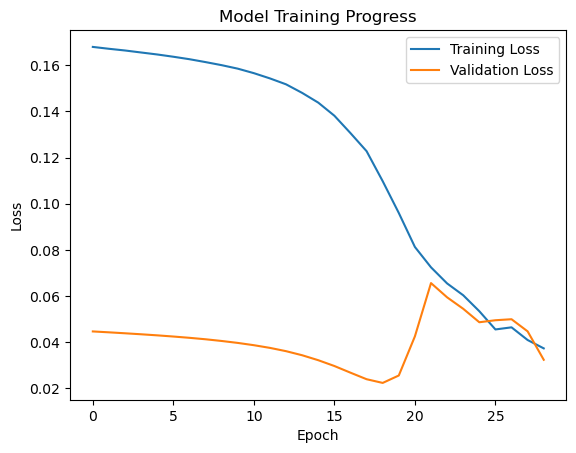

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


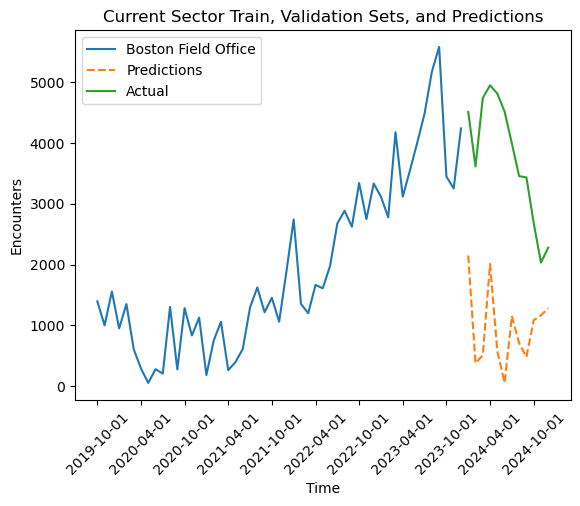

Buffalo Field Office
5
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - loss: 0.3221 - val_loss: 0.0593
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2934 - val_loss: 0.0589
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2641 - val_loss: 0.0584
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3054 - val_loss: 0.0579
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2788 - val_loss: 0.0574
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2799 - val_loss: 0.0568
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2975 - val_loss: 0.0562
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3134 - val_loss: 0.0554
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2950 - val_loss: 0.0546
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3118 - val_loss: 0.0536
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2663 - val_loss: 0.0524
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2

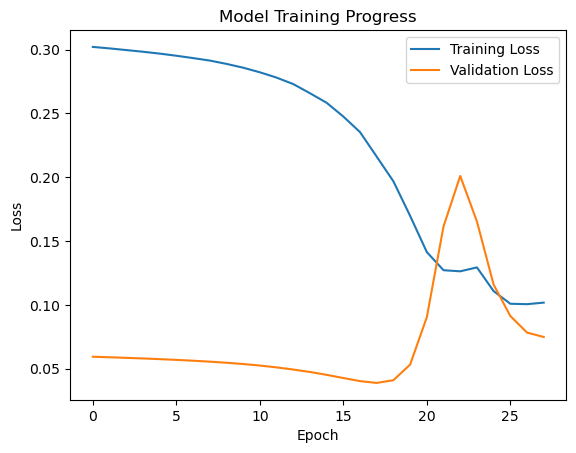

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


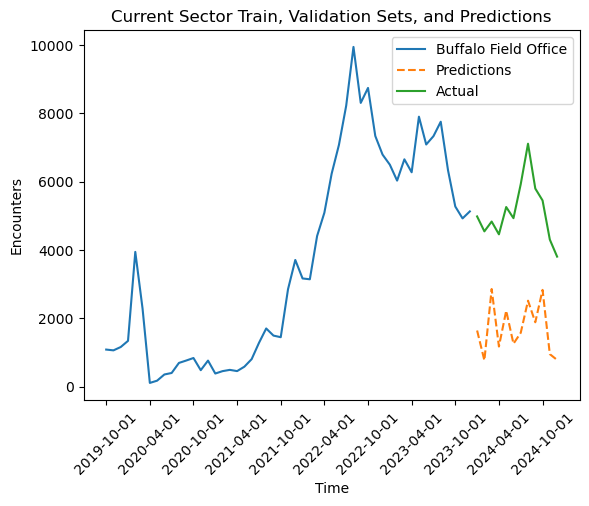

Buffalo Sector
6
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - loss: 0.0620 - val_loss: 0.1336
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0631 - val_loss: 0.1330
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0631 - val_loss: 0.1325
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0559 - val_loss: 0.1319
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0624 - val_loss: 0.1312
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0595 - val_loss: 0.1305
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0560 - val_loss: 0.1298
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0585 - val_loss: 0.1289
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0564 - val_loss: 0.1280
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0683 - val_loss: 0.1269
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0582 - val_loss: 0.1256
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0557 - 

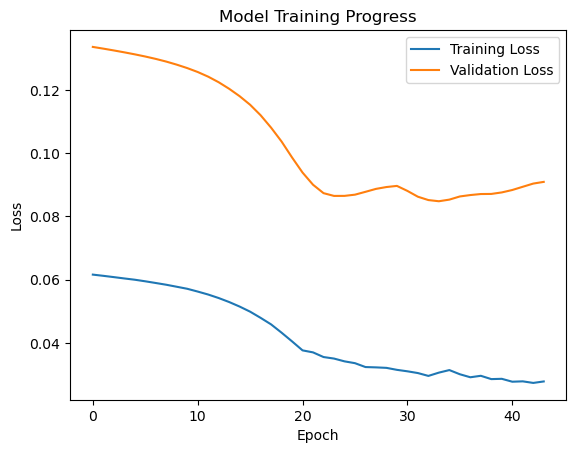

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


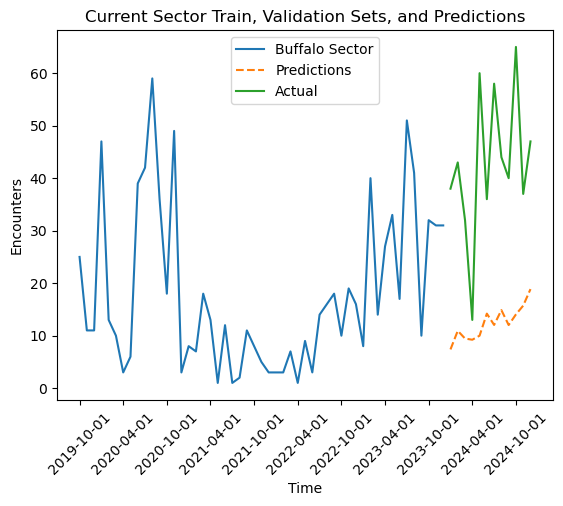

Chicago Field Office
7
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 355ms/step - loss: 0.2713 - val_loss: 0.0279
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2003 - val_loss: 0.0277
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2128 - val_loss: 0.0274
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2312 - val_loss: 0.0270
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2247 - val_loss: 0.0267
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2287 - val_loss: 0.0263
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2091 - val_loss: 0.0258
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2129 - val_loss: 0.0253
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2233 - val_loss: 0.0248
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2094 - val_loss: 0.0242
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2294 - val_loss: 0.0235
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.

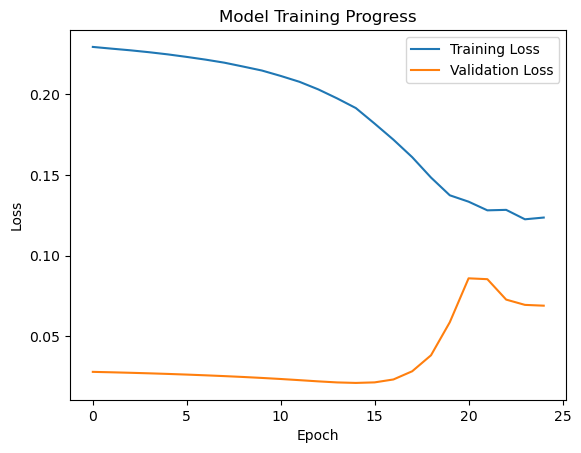

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


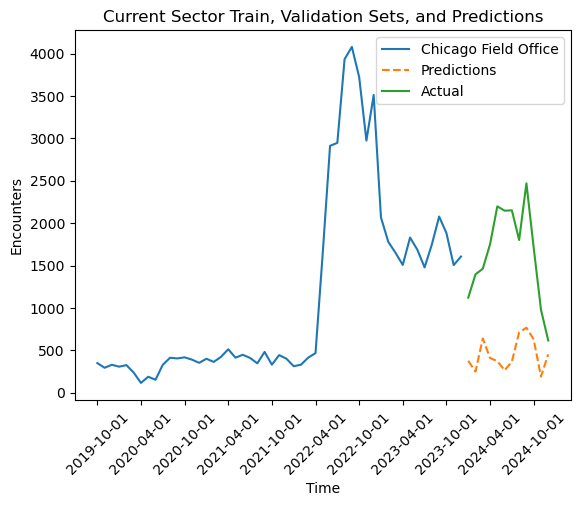

Del Rio Sector
8
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - loss: 0.2561 - val_loss: 0.1159
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2730 - val_loss: 0.1150
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2444 - val_loss: 0.1141
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2568 - val_loss: 0.1131
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2659 - val_loss: 0.1121
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2532 - val_loss: 0.1109
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2412 - val_loss: 0.1095
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2423 - val_loss: 0.1079
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2443 - val_loss: 0.1060
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2426 - val_loss: 0.1038
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2375 - val_loss: 0.1010
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2369 -

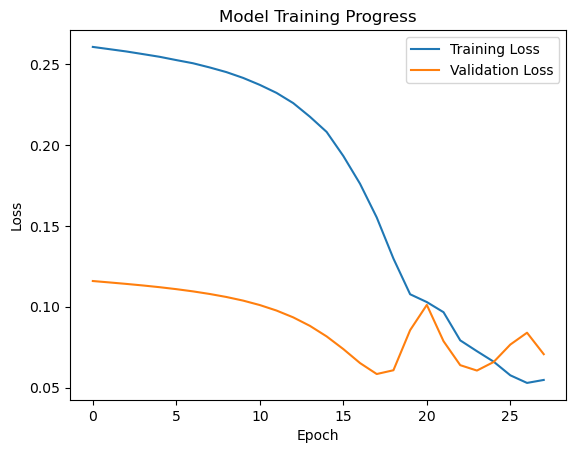

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


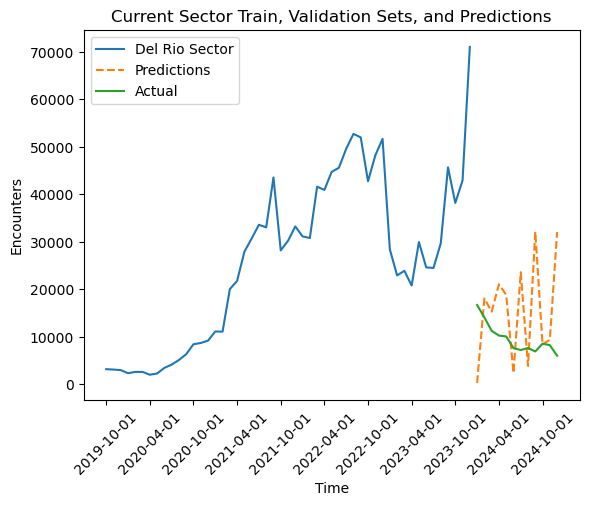

Detroit Field Office
9
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - loss: 0.3473 - val_loss: 0.0638
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3105 - val_loss: 0.0633
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.3301 - val_loss: 0.0627
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3665 - val_loss: 0.0620
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2983 - val_loss: 0.0613
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3676 - val_loss: 0.0605
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.3221 - val_loss: 0.0596
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3285 - val_loss: 0.0585
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3624 - val_loss: 0.0573
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2811 - val_loss: 0.0559
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3122 - val_loss: 0.0543
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.

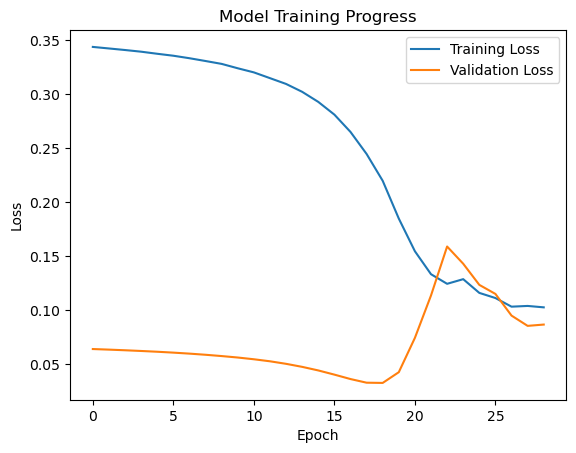

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step


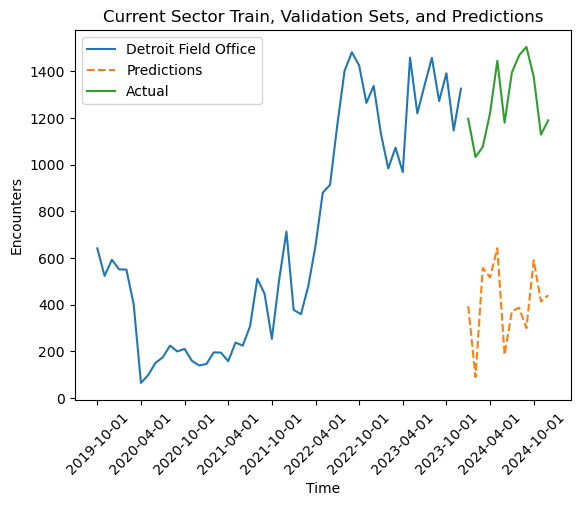

Detroit Sector
10
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - loss: 0.0560 - val_loss: 0.0450
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0669 - val_loss: 0.0448
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0551 - val_loss: 0.0446
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0453 - val_loss: 0.0444
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0658 - val_loss: 0.0441
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0532 - val_loss: 0.0439
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0500 - val_loss: 0.0436
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0608 - val_loss: 0.0433
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0416 - val_loss: 0.0430
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0494 - val_loss: 0.0427
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0473 - val_loss: 0.0424
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0496 

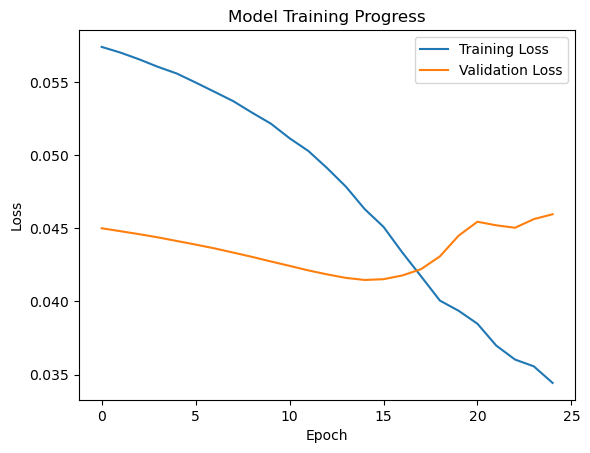

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


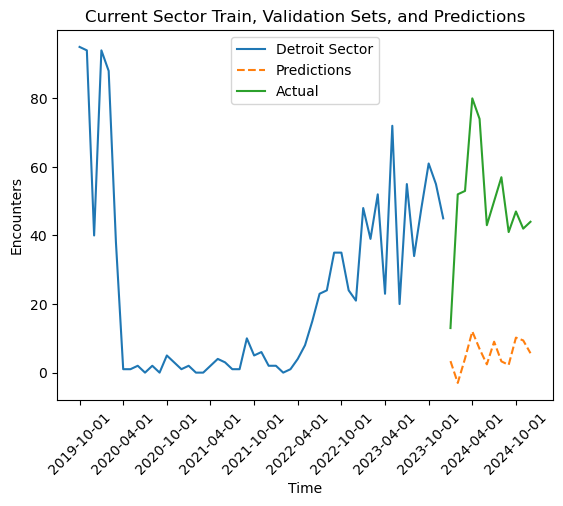

El Centro Sector
11
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - loss: 0.3175 - val_loss: 0.1797
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2998 - val_loss: 0.1784
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3133 - val_loss: 0.1769
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3082 - val_loss: 0.1754
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3088 - val_loss: 0.1736
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3012 - val_loss: 0.1717
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2981 - val_loss: 0.1695
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2845 - val_loss: 0.1669
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2929 - val_loss: 0.1638
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2865 - val_loss: 0.1600
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2895 - val_loss: 0.1552
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2720

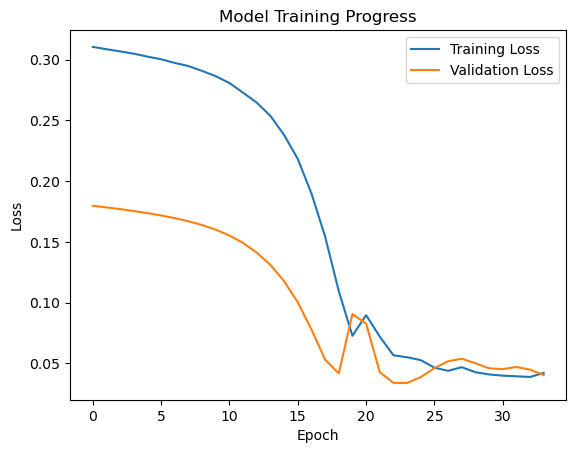

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step


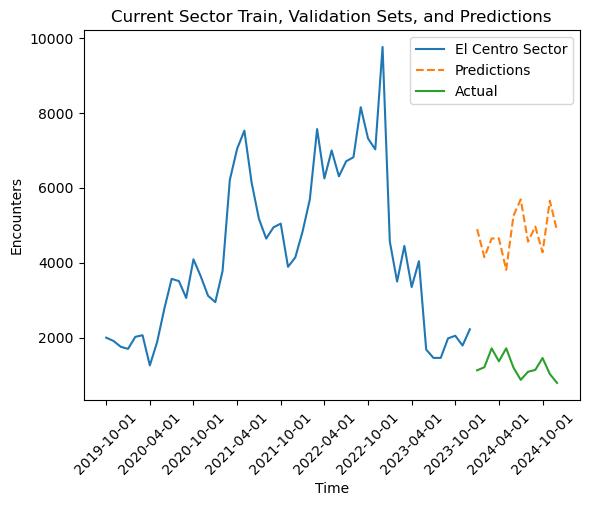

El Paso Field Office
12
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - loss: 0.0695 - val_loss: 0.0103
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0717 - val_loss: 0.0101
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0643 - val_loss: 0.0098
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0787 - val_loss: 0.0096
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0720 - val_loss: 0.0093
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0666 - val_loss: 0.0090
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0851 - val_loss: 0.0086
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0618 - val_loss: 0.0083
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0691 - val_loss: 0.0079
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0651 - val_loss: 0.0074
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0638 - val_loss: 0.0070
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0

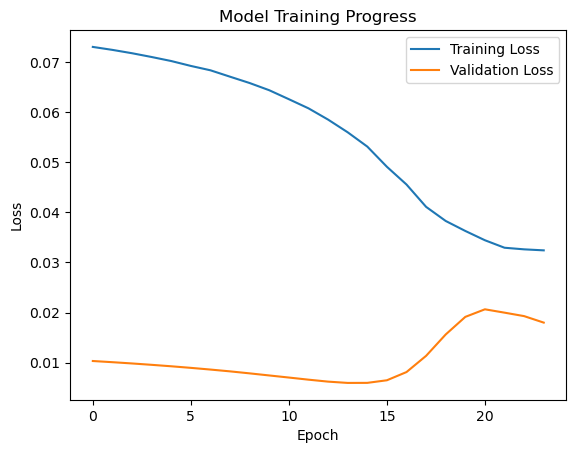

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


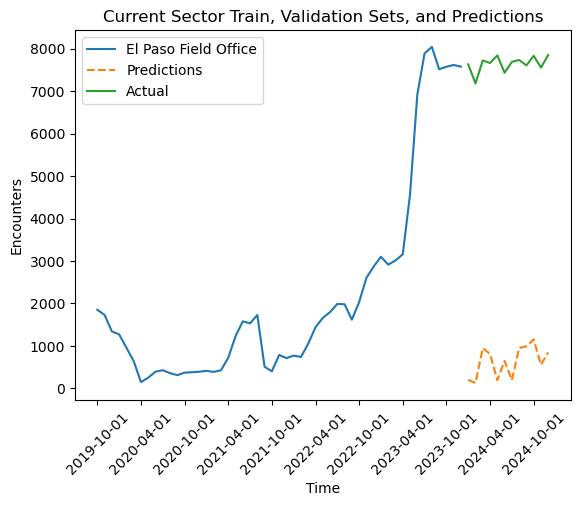

El Paso Sector
13
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - loss: 0.2964 - val_loss: 0.0777
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2823 - val_loss: 0.0769
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2802 - val_loss: 0.0761
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2714 - val_loss: 0.0751
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.2592 - val_loss: 0.0741
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3055 - val_loss: 0.0729
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2713 - val_loss: 0.0715
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2740 - val_loss: 0.0699
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2650 - val_loss: 0.0681
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2642 - val_loss: 0.0659
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2652 - val_loss: 0.0632
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2628 

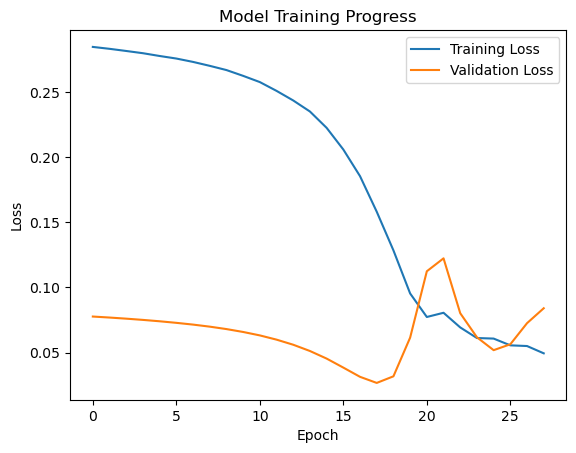

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


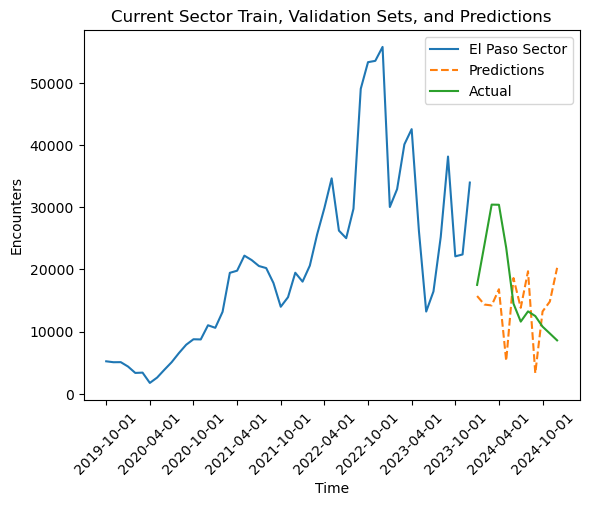

Grand Forks Sector
14
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - loss: 0.0535 - val_loss: 0.0369
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0532 - val_loss: 0.0366
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0508 - val_loss: 0.0363
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0473 - val_loss: 0.0360
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0612 - val_loss: 0.0356
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0460 - val_loss: 0.0352
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0459 - val_loss: 0.0348
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0465 - val_loss: 0.0343
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0467 - val_loss: 0.0338
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0479 - val_loss: 0.0332
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0475 - val_loss: 0.0325
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0

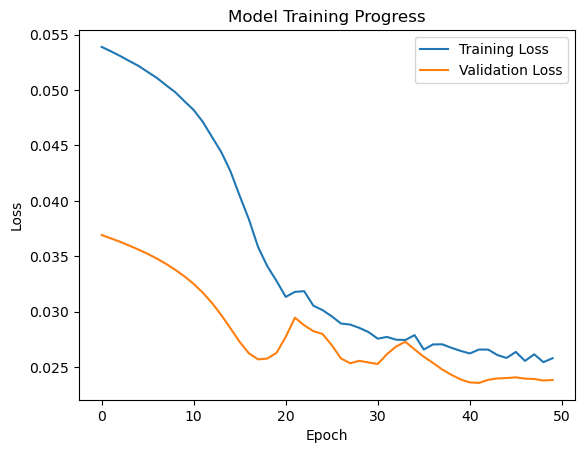

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


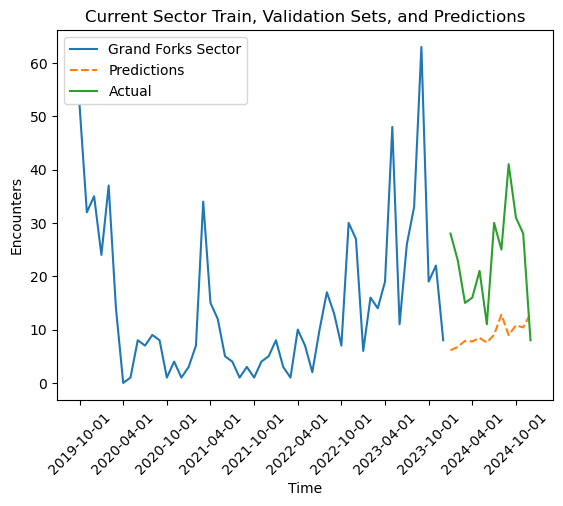

Havre Sector
15
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - loss: 0.0725 - val_loss: 0.0543
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0724 - val_loss: 0.0539
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0685 - val_loss: 0.0535
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0689 - val_loss: 0.0530
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0670 - val_loss: 0.0525
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0640 - val_loss: 0.0520
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0673 - val_loss: 0.0513
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0655 - val_loss: 0.0506
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0655 - val_loss: 0.0499
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0643 - val_loss: 0.0489
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0645 - val_loss: 0.0479
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0593 - v

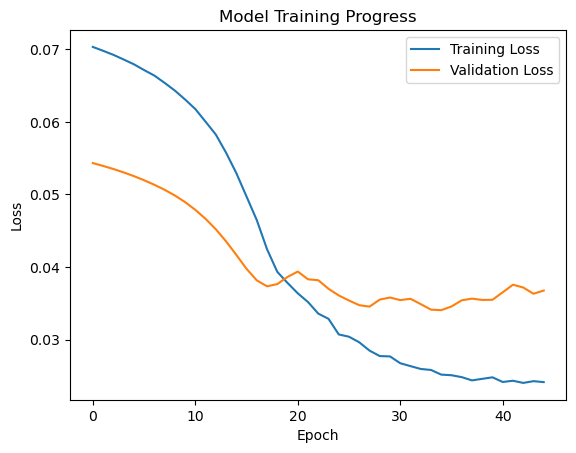

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step


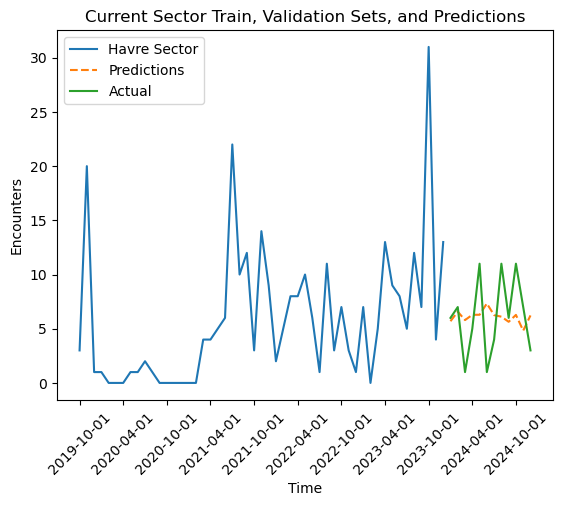

Houlton Sector
16
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - loss: 0.2031 - val_loss: 0.0770
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1935 - val_loss: 0.0766
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2015 - val_loss: 0.0762
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2056 - val_loss: 0.0758
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2146 - val_loss: 0.0754
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2158 - val_loss: 0.0749
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2132 - val_loss: 0.0743
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2032 - val_loss: 0.0737
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2075 - val_loss: 0.0730
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2113 - val_loss: 0.0722
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2011 - val_loss: 0.0713
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1871 -

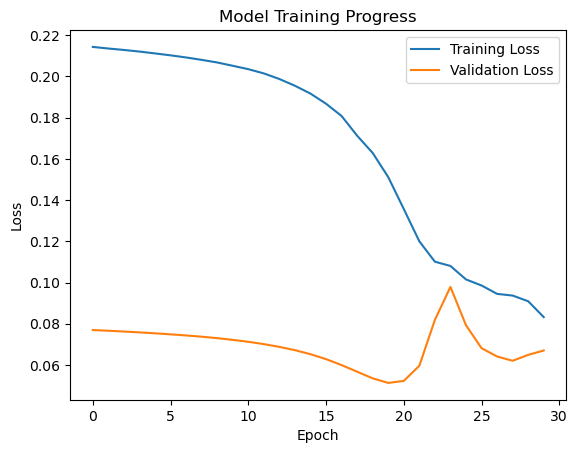

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


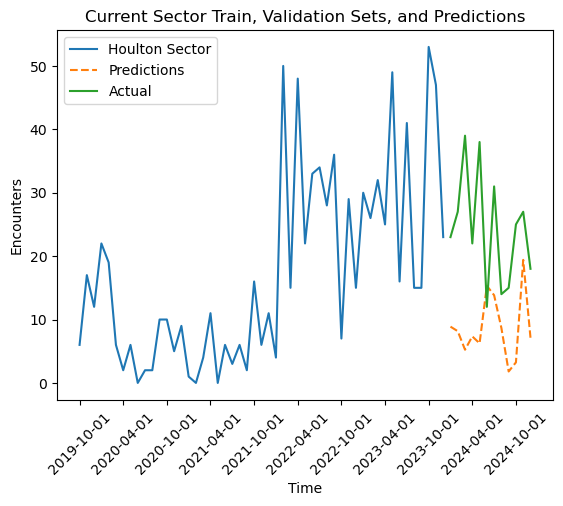

Houston Field Office
17
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - loss: 0.4533 - val_loss: 0.3080
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4376 - val_loss: 0.3063
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4734 - val_loss: 0.3044
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4532 - val_loss: 0.3024
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4397 - val_loss: 0.3001
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4282 - val_loss: 0.2975
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4475 - val_loss: 0.2944
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4380 - val_loss: 0.2907
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.4156 - val_loss: 0.2861
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4180 - val_loss: 0.2806
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4175 - val_loss: 0.2735
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0

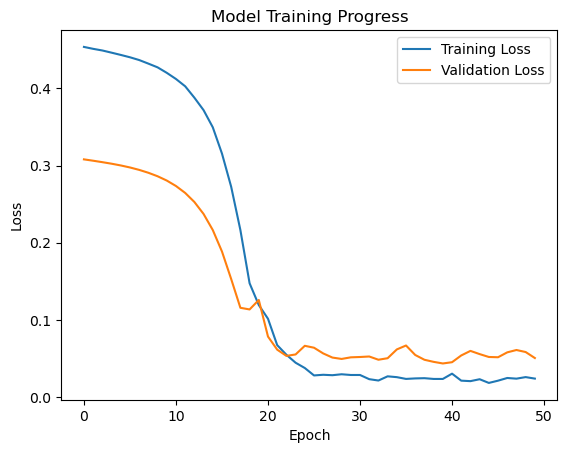

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step


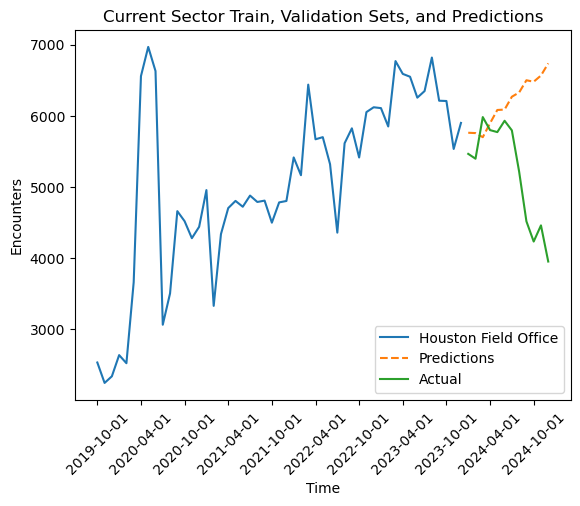

Laredo Field Office
18
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - loss: 0.1659 - val_loss: 0.0129
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1480 - val_loss: 0.0127
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1679 - val_loss: 0.0125
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1456 - val_loss: 0.0123
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1556 - val_loss: 0.0121
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1696 - val_loss: 0.0119
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1275 - val_loss: 0.0116
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1356 - val_loss: 0.0113
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1240 - val_loss: 0.0110
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1539 - val_loss: 0.0106
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1353 - val_loss: 0.0102
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.

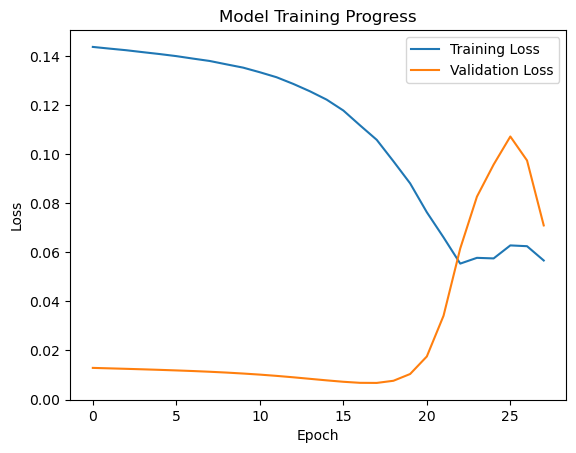

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


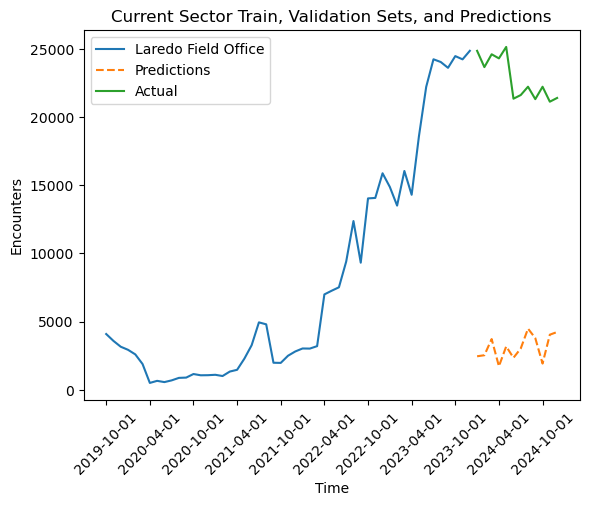

Laredo Sector
19
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 447ms/step - loss: 0.3147 - val_loss: 0.3160
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3082 - val_loss: 0.3140
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3172 - val_loss: 0.3119
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3143 - val_loss: 0.3094
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3051 - val_loss: 0.3067
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3091 - val_loss: 0.3035
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3025 - val_loss: 0.2999
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3037 - val_loss: 0.2958
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2950 - val_loss: 0.2908
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2857 - val_loss: 0.2846
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2963 - val_loss: 0.2767
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2439 -

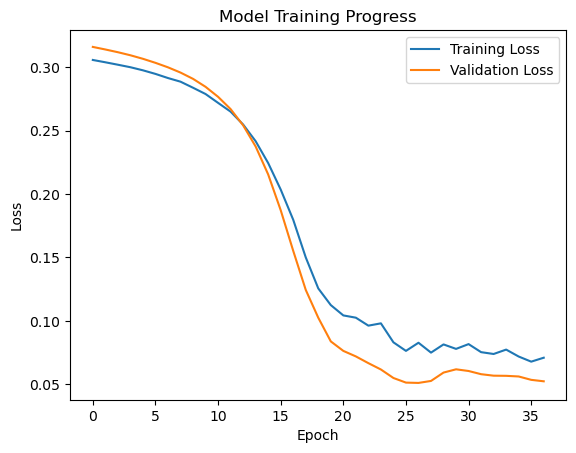

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


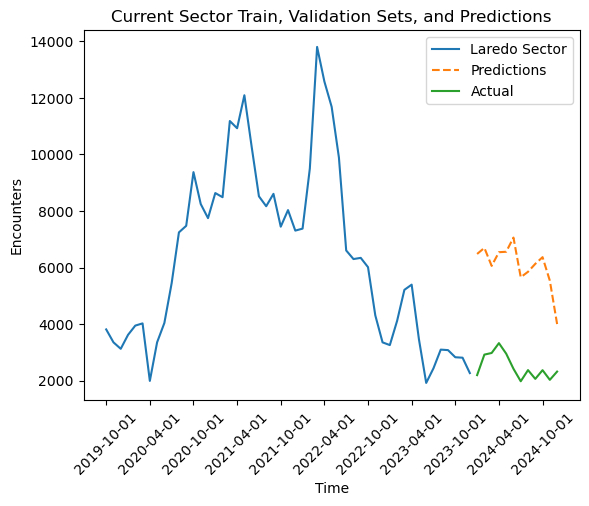

Los Angeles Field Office
20
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - loss: 0.4965 - val_loss: 0.2341
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.4805 - val_loss: 0.2328
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4905 - val_loss: 0.2316
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5022 - val_loss: 0.2303
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.5114 - val_loss: 0.2287
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4820 - val_loss: 0.2270
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.4575 - val_loss: 0.2250
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4611 - val_loss: 0.2225
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4600 - val_loss: 0.2195
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.4555 - val_loss: 0.2159
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4493 - val_loss: 0.2114
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - los

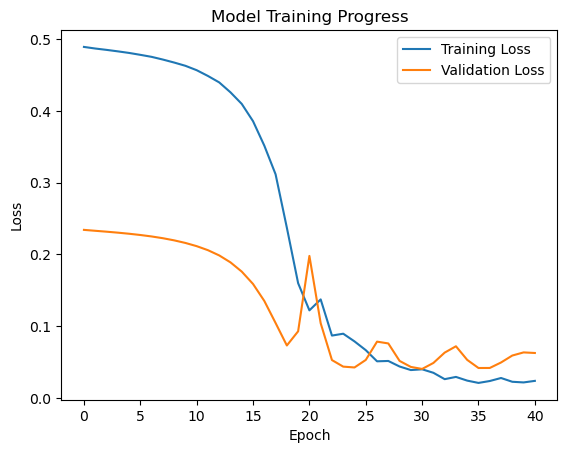

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


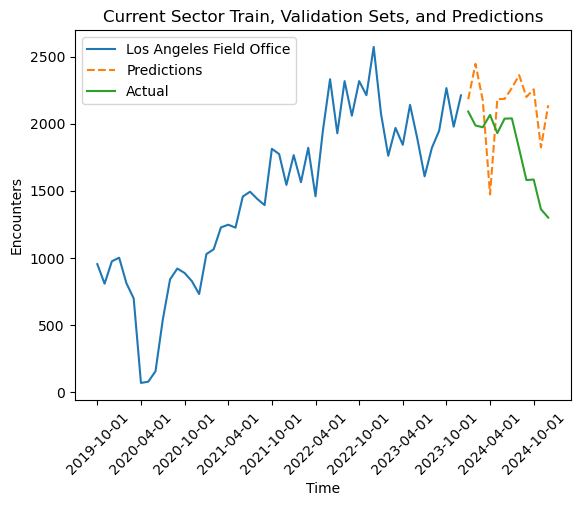

Miami Field Office
21
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 370ms/step - loss: 0.0831 - val_loss: 0.0017
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1091 - val_loss: 0.0016
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0801 - val_loss: 0.0015
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0702 - val_loss: 0.0015
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0910 - val_loss: 0.0014
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0959 - val_loss: 0.0013
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0944 - val_loss: 0.0013
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1040 - val_loss: 0.0012
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0817 - val_loss: 0.0011
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0832 - val_loss: 0.0011
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0857 - val_loss: 0.0010
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0

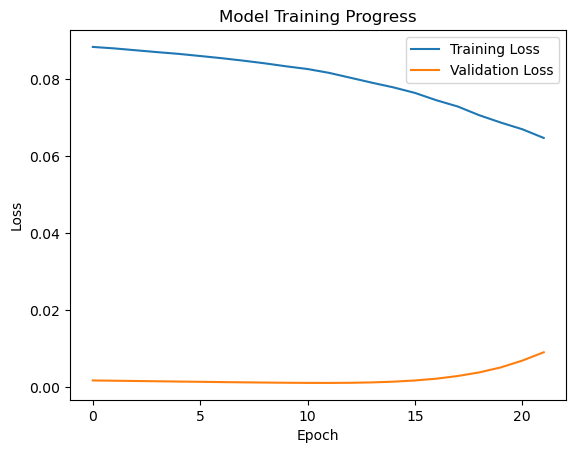

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


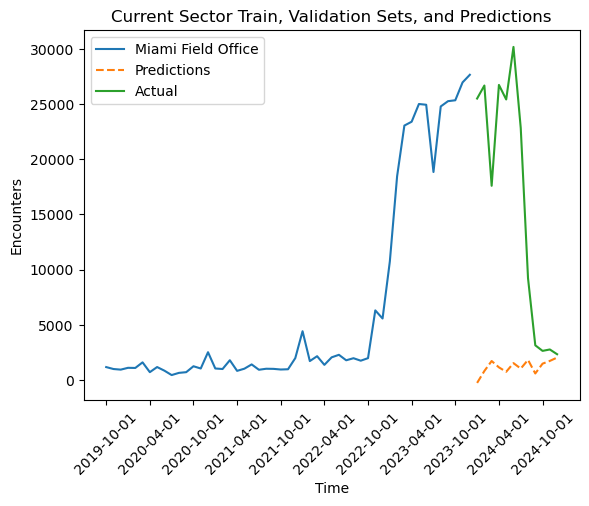

Miami Sector
22
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 431ms/step - loss: 0.1536 - val_loss: 0.0155
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.1565 - val_loss: 0.0153
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1571 - val_loss: 0.0150
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1399 - val_loss: 0.0148
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1404 - val_loss: 0.0145
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1451 - val_loss: 0.0142
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1337 - val_loss: 0.0139
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1573 - val_loss: 0.0136
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1364 - val_loss: 0.0132
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1498 - val_loss: 0.0127
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1236 - val_loss: 0.0122
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1178 - 

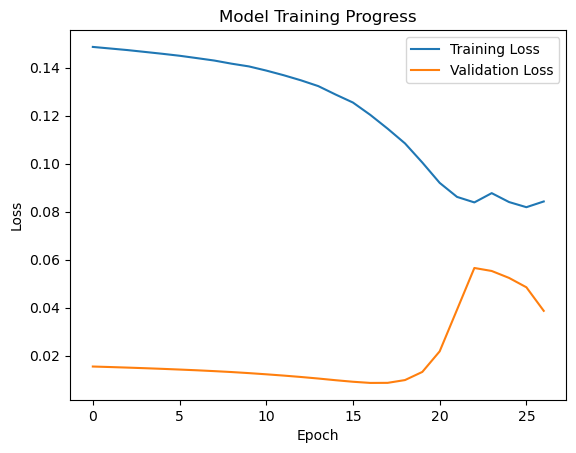

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step


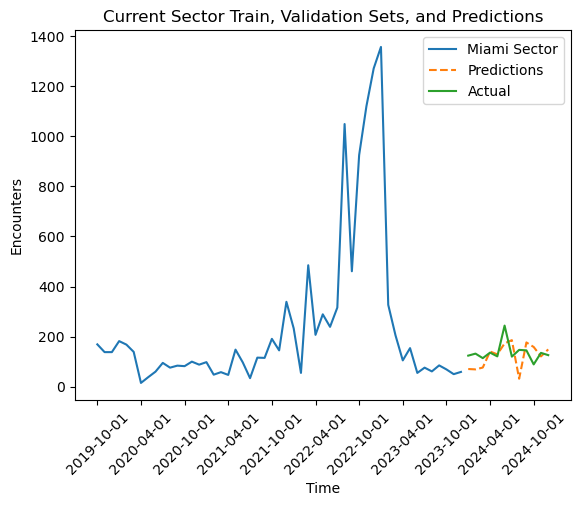

New Orleans Field Office
23
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 516ms/step - loss: 0.1488 - val_loss: 0.2578
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1397 - val_loss: 0.2565
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1247 - val_loss: 0.2551
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1342 - val_loss: 0.2535
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1232 - val_loss: 0.2517
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1374 - val_loss: 0.2497
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1432 - val_loss: 0.2473
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1269 - val_loss: 0.2446
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1236 - val_loss: 0.2414
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1293 - val_loss: 0.2376
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1218 - val_loss: 0.2332
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - lo

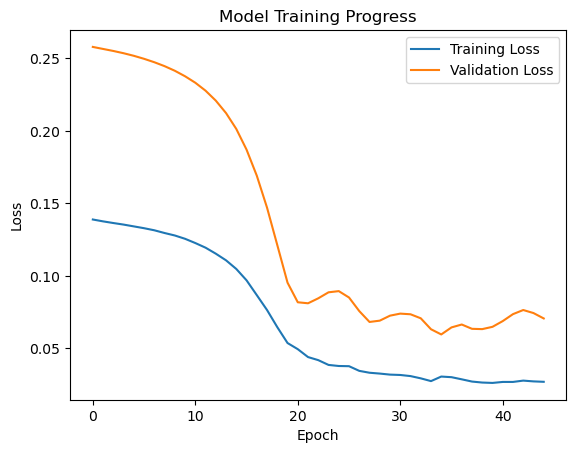

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


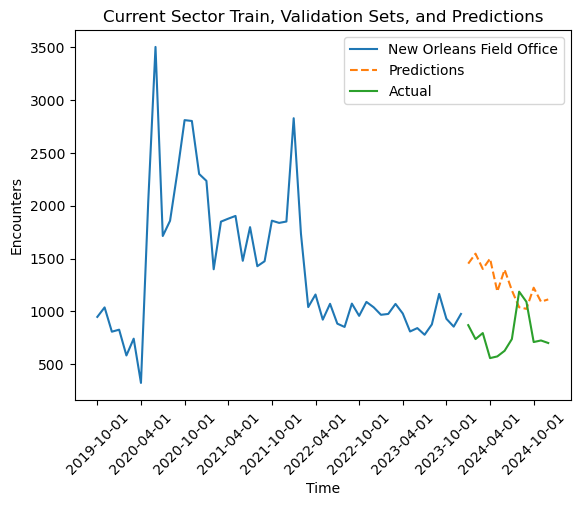

New Orleans Sector
24
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - loss: 0.0802 - val_loss: 0.0795
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0808 - val_loss: 0.0790
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0785 - val_loss: 0.0783
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0778 - val_loss: 0.0776
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0768 - val_loss: 0.0767
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0768 - val_loss: 0.0758
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0743 - val_loss: 0.0747
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0742 - val_loss: 0.0735
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0704 - val_loss: 0.0720
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0690 - val_loss: 0.0703
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0666 - val_loss: 0.0683
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0

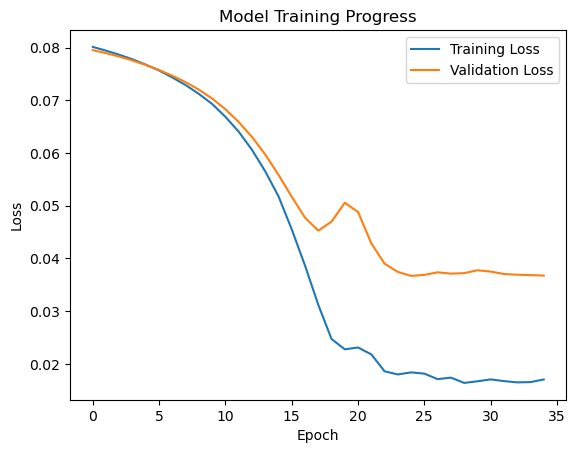

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


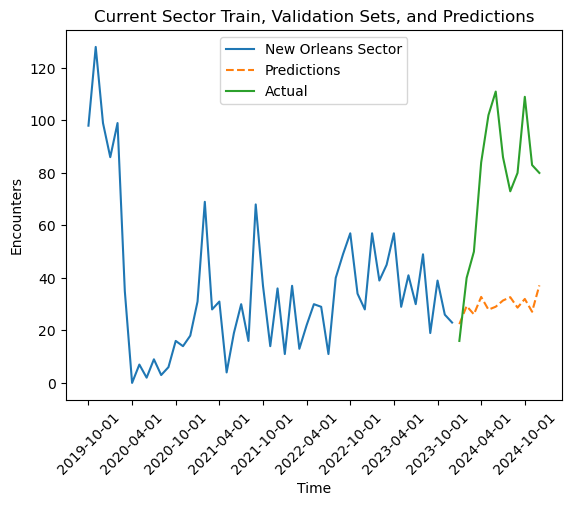

New York Field Office
25
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - loss: 0.3289 - val_loss: 0.0592
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3031 - val_loss: 0.0585
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3440 - val_loss: 0.0577
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3212 - val_loss: 0.0569
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.3143 - val_loss: 0.0560
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2990 - val_loss: 0.0550
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2906 - val_loss: 0.0538
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2656 - val_loss: 0.0525
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3176 - val_loss: 0.0510
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3125 - val_loss: 0.0492
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2917 - val_loss: 0.0471
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 

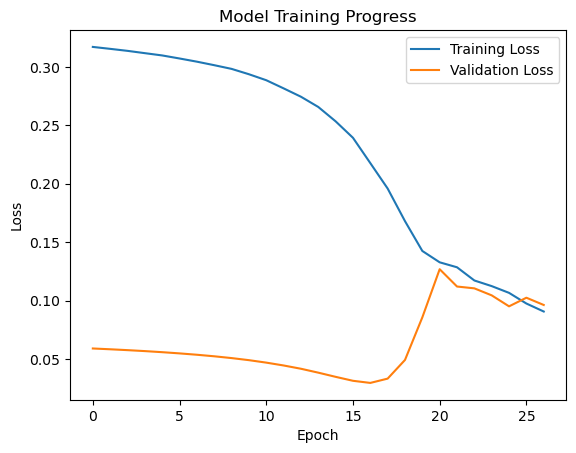

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


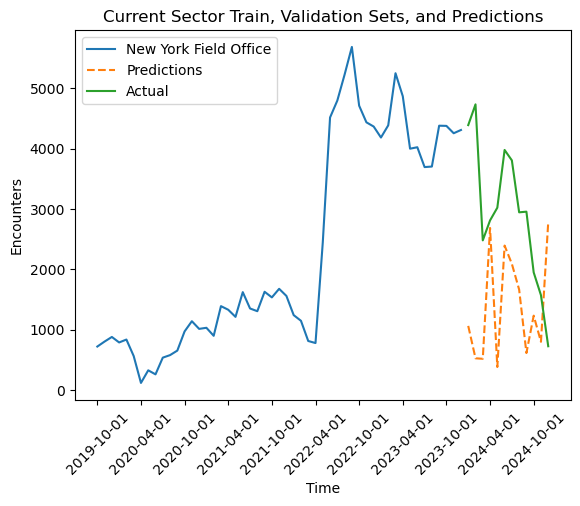

Portland Field Office
26
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 393ms/step - loss: 0.2134 - val_loss: 0.0535
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2055 - val_loss: 0.0532
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2227 - val_loss: 0.0528
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1955 - val_loss: 0.0523
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2020 - val_loss: 0.0518
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2065 - val_loss: 0.0513
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1987 - val_loss: 0.0507
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2155 - val_loss: 0.0501
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2047 - val_loss: 0.0494
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1964 - val_loss: 0.0486
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1891 - val_loss: 0.0475
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 

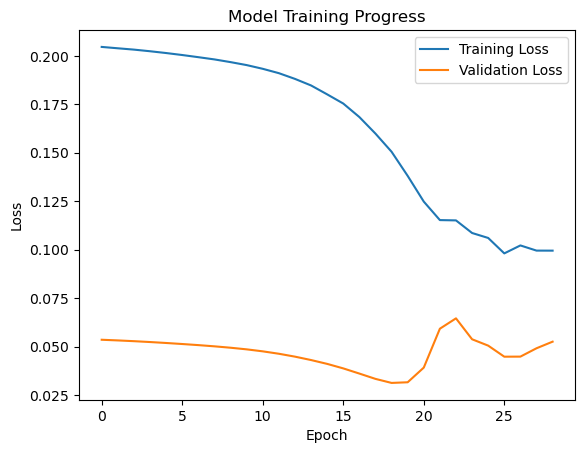

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


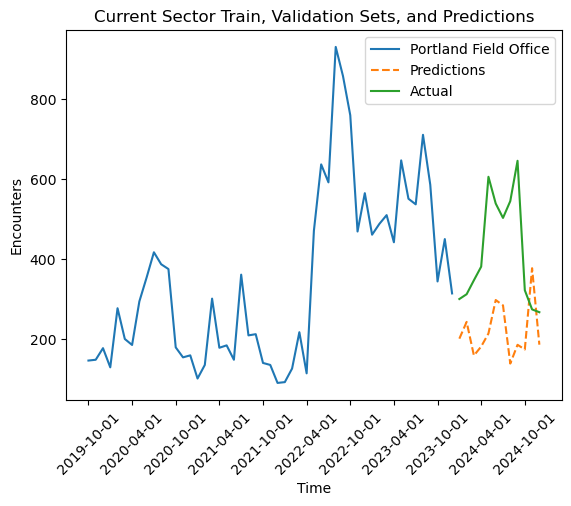

Preclearance Field Office
27
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 917ms/step - loss: 0.3594 - val_loss: 0.2352
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3698 - val_loss: 0.2337
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3936 - val_loss: 0.2320
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3600 - val_loss: 0.2300
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3777 - val_loss: 0.2279
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3730 - val_loss: 0.2254
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3679 - val_loss: 0.2226
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3448 - val_loss: 0.2193
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3661 - val_loss: 0.2151
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3272 - val_loss: 0.2100
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3106 - val_loss: 0.2034
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - lo

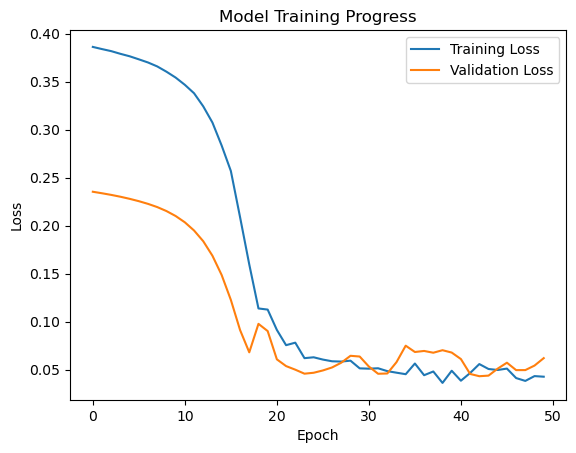

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


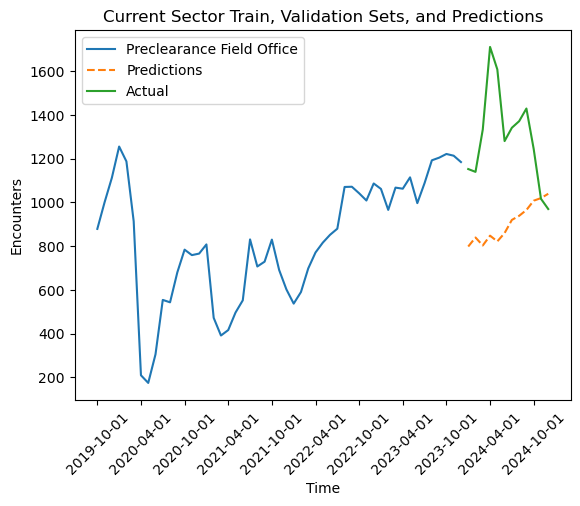

Ramey Sector
28
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - loss: 0.2162 - val_loss: 0.1128
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2177 - val_loss: 0.1120
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2146 - val_loss: 0.1111
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2134 - val_loss: 0.1101
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2084 - val_loss: 0.1090
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2186 - val_loss: 0.1077
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1962 - val_loss: 0.1063
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2047 - val_loss: 0.1047
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2044 - val_loss: 0.1028
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1967 - val_loss: 0.1006
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1893 - val_loss: 0.0979
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1930 - 

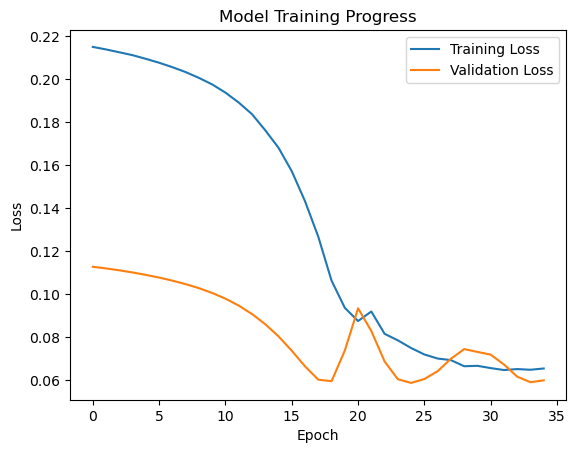

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


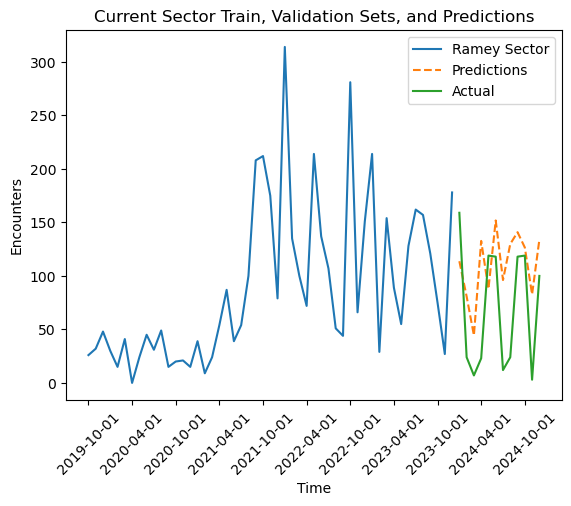

Rio Grande Valley Sector
29
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 350ms/step - loss: 0.2776 - val_loss: 0.2505
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2459 - val_loss: 0.2493
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2799 - val_loss: 0.2478
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2834 - val_loss: 0.2460
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2674 - val_loss: 0.2441
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2720 - val_loss: 0.2419
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2602 - val_loss: 0.2392
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2576 - val_loss: 0.2361
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2333 - val_loss: 0.2324
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2654 - val_loss: 0.2278
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.2383 - val_loss: 0.2222
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss

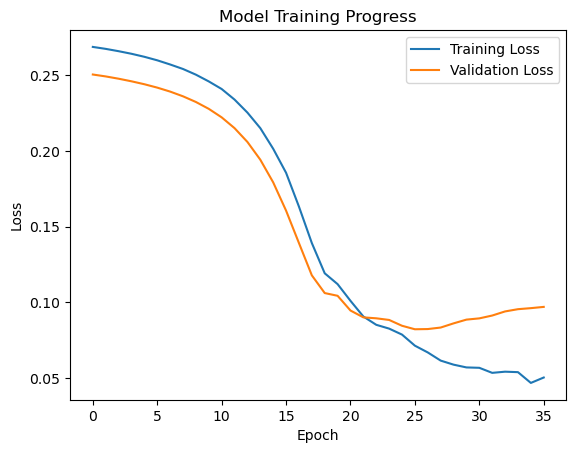

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step


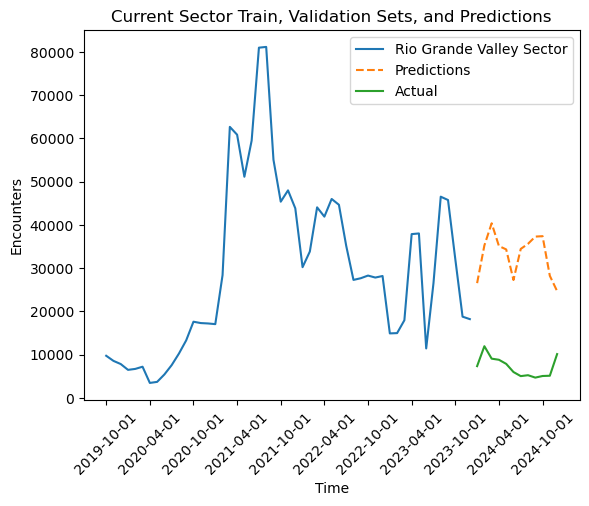

San Diego Field Office
30
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 466ms/step - loss: 0.1114 - val_loss: 0.0384
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1145 - val_loss: 0.0380
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1060 - val_loss: 0.0375
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1091 - val_loss: 0.0370
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1165 - val_loss: 0.0364
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1136 - val_loss: 0.0358
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1070 - val_loss: 0.0351
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1003 - val_loss: 0.0343
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1031 - val_loss: 0.0334
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0976 - val_loss: 0.0323
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1027 - val_loss: 0.0311
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss:

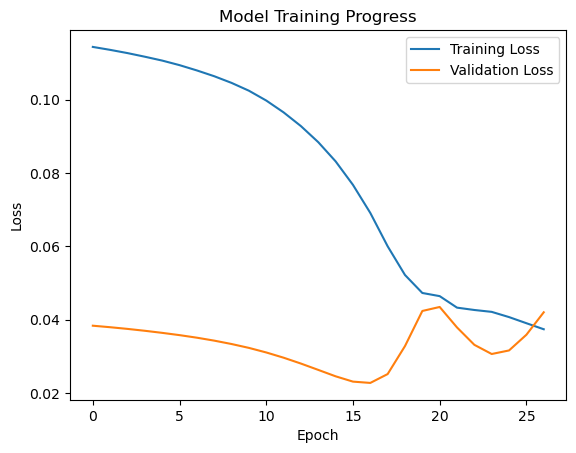

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


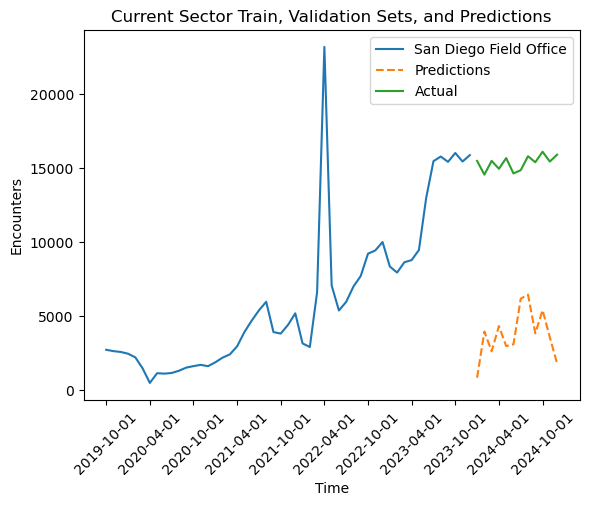

San Diego Sector
31
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - loss: 0.1676 - val_loss: 0.0850
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1706 - val_loss: 0.0840
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1743 - val_loss: 0.0829
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1739 - val_loss: 0.0817
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1664 - val_loss: 0.0804
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1710 - val_loss: 0.0788
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1647 - val_loss: 0.0770
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1597 - val_loss: 0.0749
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1478 - val_loss: 0.0724
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1509 - val_loss: 0.0693
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1462 - val_loss: 0.0656
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.148

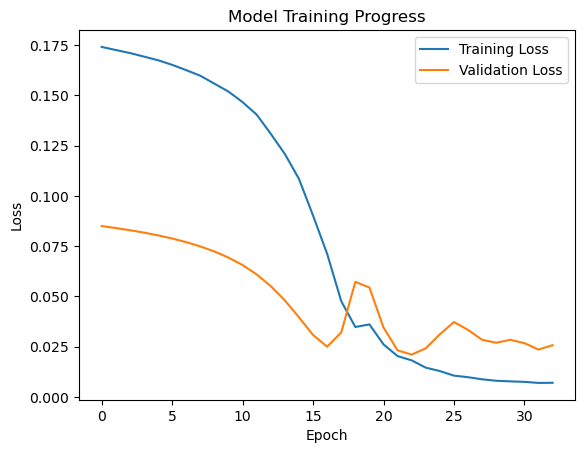

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


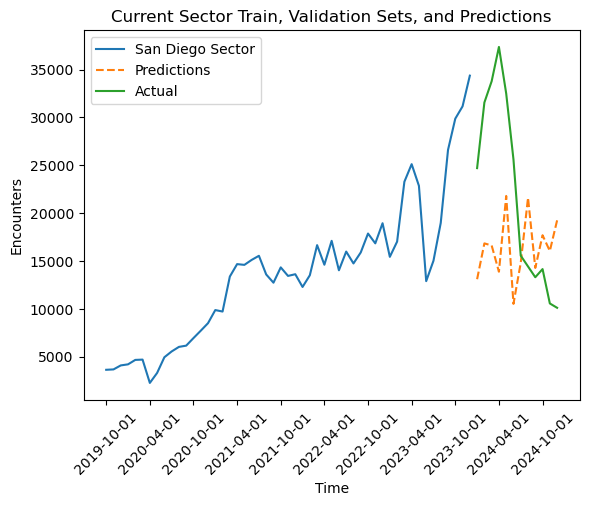

San Francisco Field Office
32
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - loss: 0.1429 - val_loss: 0.0550
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.1679 - val_loss: 0.0546
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1512 - val_loss: 0.0542
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1592 - val_loss: 0.0537
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1451 - val_loss: 0.0532
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1431 - val_loss: 0.0527
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1454 - val_loss: 0.0520
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1487 - val_loss: 0.0513
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1458 - val_loss: 0.0505
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1551 - val_loss: 0.0494
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1453 - val_loss: 0.0483
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - l

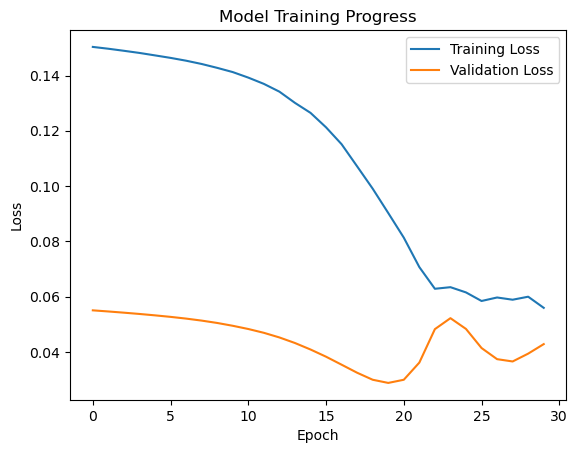

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step


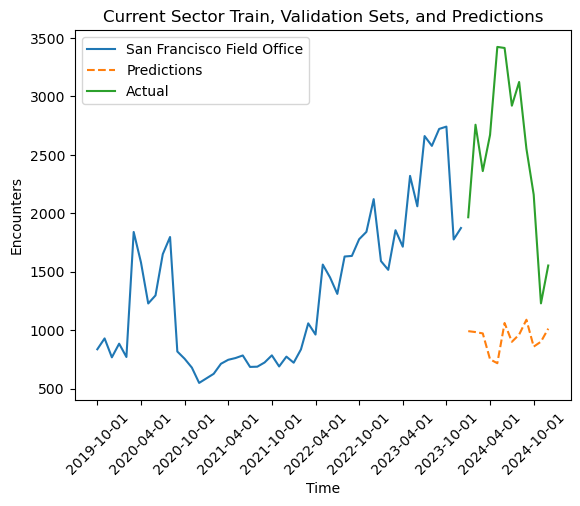

San Juan Field Office
33
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 483ms/step - loss: 0.0929 - val_loss: 0.0482
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0915 - val_loss: 0.0477
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0941 - val_loss: 0.0471
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0996 - val_loss: 0.0464
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0897 - val_loss: 0.0456
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0899 - val_loss: 0.0448
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0901 - val_loss: 0.0438
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0846 - val_loss: 0.0428
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0902 - val_loss: 0.0415
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0863 - val_loss: 0.0401
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0834 - val_loss: 0.0384
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 

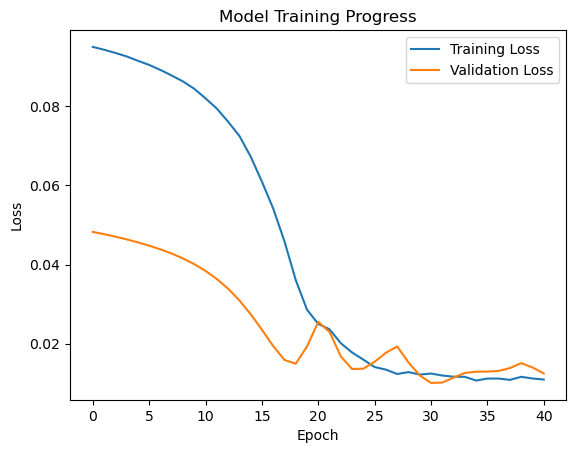

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step


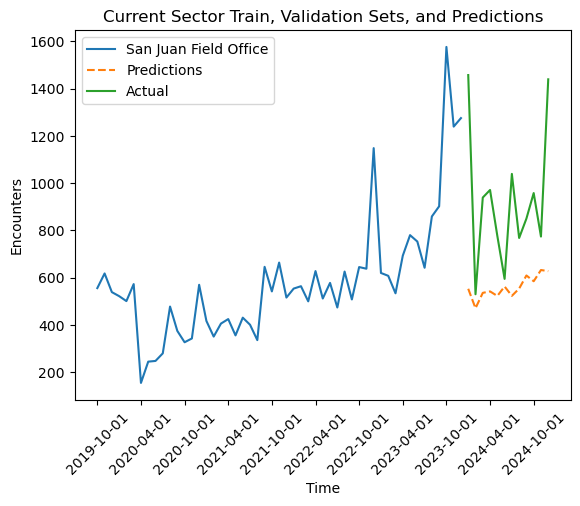

Seattle Field Office
34
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 532ms/step - loss: 0.2053 - val_loss: 0.0460
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.2191 - val_loss: 0.0453
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2359 - val_loss: 0.0446
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.2336 - val_loss: 0.0438
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2342 - val_loss: 0.0429
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2009 - val_loss: 0.0419
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2243 - val_loss: 0.0407
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2053 - val_loss: 0.0394
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.2215 - val_loss: 0.0379
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2182 - val_loss: 0.0361
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1721 - val_loss: 0.0340
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 

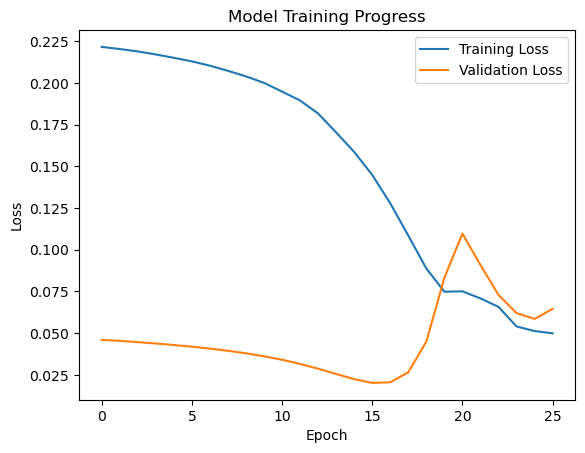

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


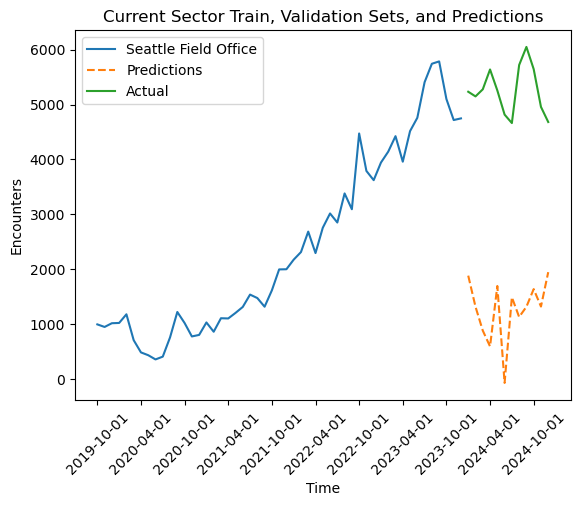

Spokane Sector
35
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - loss: 0.0416 - val_loss: 0.0489
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0449 - val_loss: 0.0486
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0451 - val_loss: 0.0481
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0483 - val_loss: 0.0477
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0424 - val_loss: 0.0472
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0400 - val_loss: 0.0467
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0389 - val_loss: 0.0461
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0399 - val_loss: 0.0454
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0370 - val_loss: 0.0446
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0415 - val_loss: 0.0437
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0449 - val_loss: 0.0427
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0455 

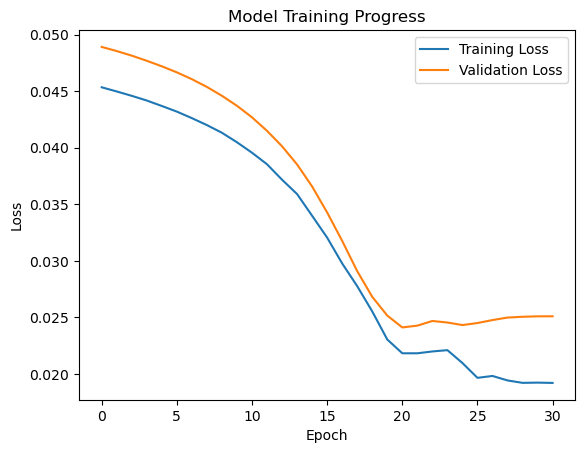

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


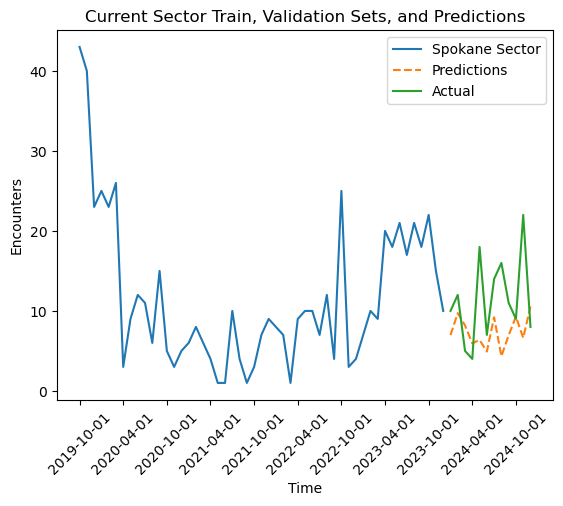

Swanton Sector
36
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - loss: 0.0587 - val_loss: 0.0014
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0627 - val_loss: 0.0013
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0603 - val_loss: 0.0012
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0637 - val_loss: 0.0011
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0535 - val_loss: 9.7125e-04
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0577 - val_loss: 8.7888e-04
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0419 - val_loss: 7.9307e-04
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0437 - val_loss: 7.1342e-04
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0649 - val_loss: 6.5447e-04
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0639 - val_loss: 6.4020e-04
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0583 - val_loss: 6.9603e-04
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0

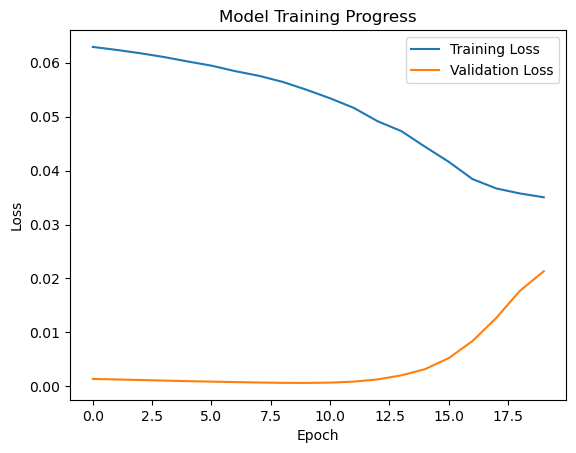

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


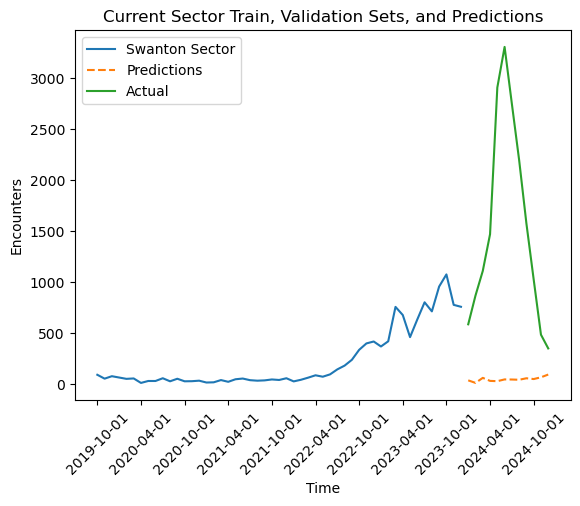

Tampa Field Office
37
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 404ms/step - loss: 0.1916 - val_loss: 0.0200
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.2071 - val_loss: 0.0197
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1869 - val_loss: 0.0195
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1829 - val_loss: 0.0192
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1712 - val_loss: 0.0189
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1917 - val_loss: 0.0186
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1778 - val_loss: 0.0182
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1780 - val_loss: 0.0178
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1884 - val_loss: 0.0174
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1588 - val_loss: 0.0169
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1649 - val_loss: 0.0163
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.18

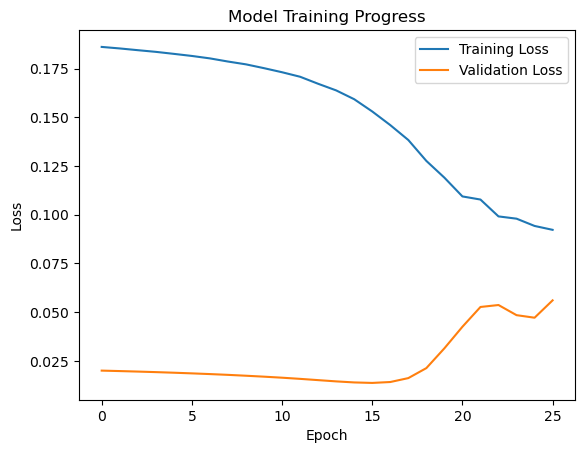

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


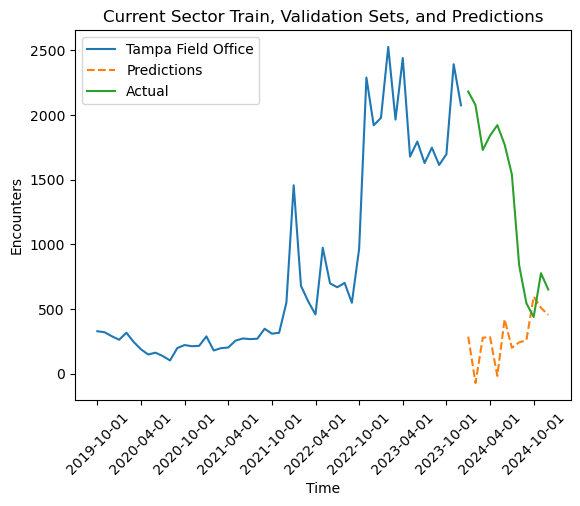

Tucson Field Office
38
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 571ms/step - loss: 0.0733 - val_loss: 0.0171
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0721 - val_loss: 0.0169
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0763 - val_loss: 0.0166
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0795 - val_loss: 0.0163
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0590 - val_loss: 0.0160
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0747 - val_loss: 0.0157
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0802 - val_loss: 0.0153
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0721 - val_loss: 0.0149
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0684 - val_loss: 0.0145
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0662 - val_loss: 0.0140
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0523 - val_loss: 0.0134
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.

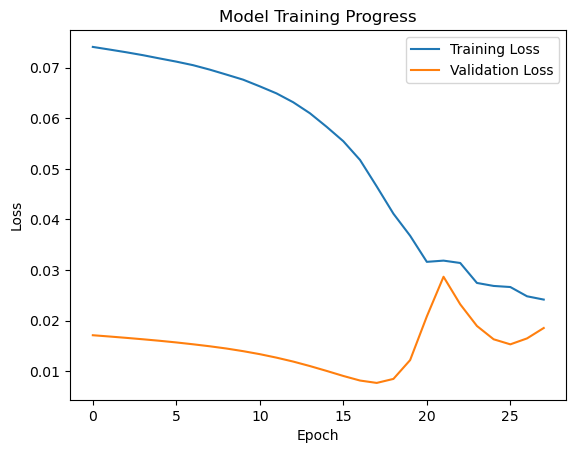

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


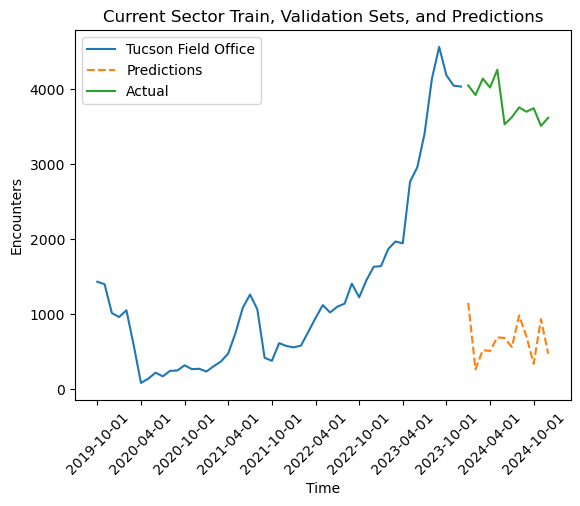

Tucson Sector
39
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 431ms/step - loss: 0.0619 - val_loss: 0.0300
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0637 - val_loss: 0.0295
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0636 - val_loss: 0.0290
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0626 - val_loss: 0.0285
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0604 - val_loss: 0.0279
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0636 - val_loss: 0.0272
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0585 - val_loss: 0.0265
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0617 - val_loss: 0.0256
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0551 - val_loss: 0.0246
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0588 - val_loss: 0.0234
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0519 - val_loss: 0.0221
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0523 -

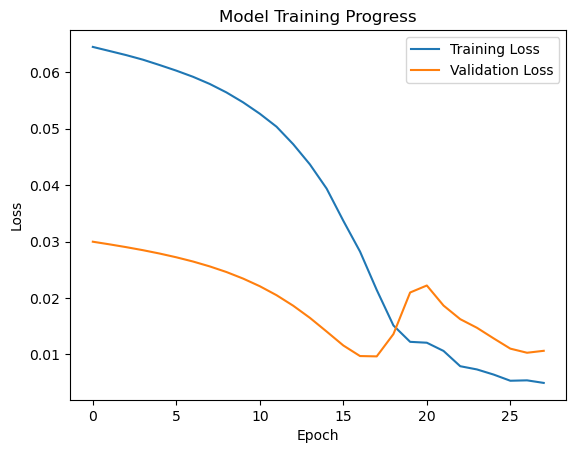

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


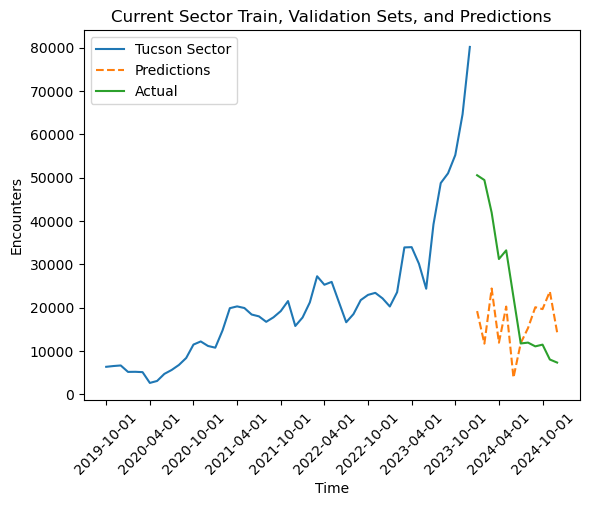

Yuma Sector
40
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - loss: 0.4172 - val_loss: 0.2011
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.3958 - val_loss: 0.2001
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4108 - val_loss: 0.1990
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3986 - val_loss: 0.1977
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.4044 - val_loss: 0.1964
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.4053 - val_loss: 0.1949
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3833 - val_loss: 0.1932
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3750 - val_loss: 0.1912
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3994 - val_loss: 0.1888
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3799 - val_loss: 0.1860
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3850 - val_loss: 0.1826
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3699 - 

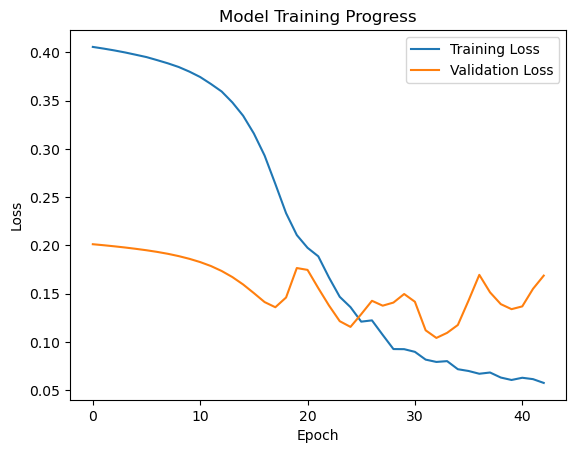

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step


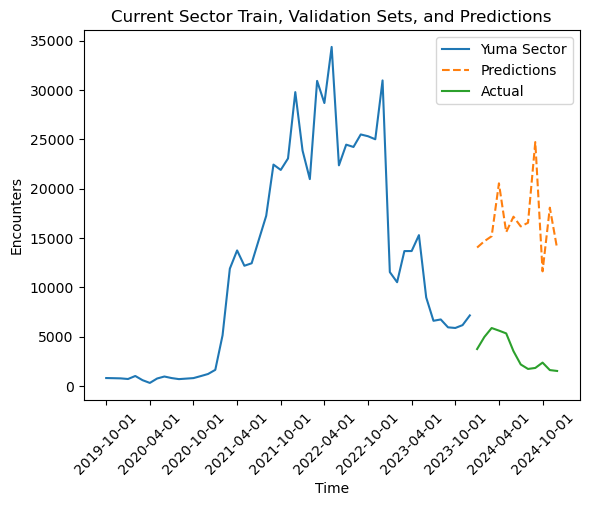

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

for index in sector_train_scaled.index:
    
    print(index)
    index_integer = sector_train_scaled.index.get_loc(index)
    print(index_integer)
    
    # Convert the first index of train_data and val_data to numpy arrays
    split_index = 25
    
    train_data_np = np.array(train_data[index_integer][:split_index])
    train_data_y_np = np.array(val_data[index_integer][:split_index])
    
    val_data_np = np.array(train_data[index_integer][:split_index])
    val_data_y_np = np.array(val_data[index_integer][:split_index])
    
    
    # Reshape the data to fit the model's input requirements
    # Assuming the model expects input shape (batch_size, input_size)
    train_data_np = train_data_np.reshape(-1, input_size, 1)
    train_data_y_np = train_data_y_np.reshape(-1, input_size, 1)
    
    val_data_np = val_data_np.reshape(-1, input_size, 1)
    val_data_y_np = val_data_y_np.reshape(-1, input_size, 1)
    
    # Convert numpy arrays to tensors
    train_data_tensor = tf.convert_to_tensor(train_data_np, dtype=tf.float32)
    train_data_y_tensor = tf.convert_to_tensor(train_data_y_np , dtype=tf.float32)
    val_data_tensor = tf.convert_to_tensor(val_data_np, dtype=tf.float32)
    val_data_y_tensor = tf.convert_to_tensor(val_data_np, dtype=tf.float32)

    optimizer = Adam(learning_rate=0.0001)

    lstm_model = Sequential()
    lstm_model.add(Input(shape=(input_size, 1)))
    lstm_model.add(LSTM(units=input_size, activation='relu', return_sequences=True))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(units= 256, activation='relu', return_sequences=True))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(units= 128, activation='relu', return_sequences=True))
    lstm_model.add(Dropout(0.3))
    lstm_model.add(LSTM(units=64, activation='relu', return_sequences=False))
    lstm_model.add(Dense(units=12, activation='linear'))  # Output layer for regression

    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # Train the model
    train_progress = lstm_model.fit(train_data_tensor, train_data_y_tensor, epochs=50, batch_size=8, validation_data=(val_data_tensor, val_data_y_tensor),callbacks = [early_stopping], verbose=1)  


    # Save the model at the end of training
    model_save_path = f'C:/AA-Capstone/Model_Outputs/saved_models/{index}_lstm_model.keras'
    lstm_model.save(model_save_path)
    
    
    plt.plot(train_progress.history['loss'])
    plt.plot(train_progress.history['val_loss'])
    plt.title('Model Training Progress')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
    
    plot_save_path = f'C:/AA-Capstone/Model_Outputs/lstm_val_plot/{index}_valplot.png'
    plt.savefig(plot_save_path)
    plt.show()

    test_input = np.array(sector_train_scaled.iloc[index_integer][-input_size:]).reshape(-1, input_size, 1)

    test_input_tensor = tf.convert_to_tensor(test_input, dtype=tf.float32)

    predictions = lstm_model.predict(test_input_tensor)

    current_sector_train = sector_train.loc[index]
    current_sector_actual = test_data.loc[index]
    predictions = scalers[index].inverse_transform(predictions)



    # Plot the current_sector_train data
    
    plt.plot(current_sector_train.values, label=index)

    # Plot the predictions data
    plt.plot(range(len(current_sector_train), len(current_sector_train) + len(predictions.flatten())), predictions.flatten(), label='Predictions', linestyle='--')

    # Ensure the lengths of the x and y data match
    actual_values = current_sector_actual.values[:len(predictions.flatten())]

    # Plot the actual data
    plt.plot(range(len(current_sector_train), len(current_sector_train) + len(actual_values)), actual_values, label='Actual')

    # Set the x-values as dates from the train and test sequences
    dates = list(sector_train.columns) + list(test_data.columns)

    plt.title('Current Sector Train, Validation Sets, and Predictions')
    plt.xlabel('Time')
    plt.ylabel('Encounters')
    plt.xticks(ticks=range(0, len(dates), 6), labels=dates[::6], rotation=45)
    plt.legend()

    pred_save_path = f'C:/AA-Capstone/Model_Outputs/lstm_pred_plot/{index}_predplot.png'
    plt.savefig(pred_save_path)

    plt.show()


